In [1]:
import pickle
import pandas as pd
import numpy as np
from altair import *

In [2]:
data = pickle.load(open("ip_log.jpg", "rb"))

In [4]:
ip_list = []
country_list = []
function_list = []
time_list = []
year_list = []
month_list = []

In [5]:
for i in range(len(data)):
    for j in range(len(data[i])):
        if(j%4 == 0):
            ip_list.append(data[i][j])
        elif(j%4 == 1):
            country_list.append(data[i][j])
        elif(j%4 == 2):
            function_list.append(data[i][j])
        elif(j%4 == 3):
            time_list.append(data[i][j])
            year_list.append(data[i][j].year)
            month_list.append(data[i][j].month)
            
df_ip = pd.DataFrame(ip_list, columns=['ip'])
df_country = pd.DataFrame(country_list, columns=['country'])
df_function = pd.DataFrame(function_list, columns=['function'])
df_year = pd.DataFrame(year_list, columns=['year'])
df_month = pd.DataFrame(month_list, columns=['month'])

In [7]:
data_df = pd.concat([df_ip, df_country, df_function, df_year, df_month], axis = 1)

In [8]:
data_sort_time_country = data_df.groupby(['country', 'year', 'month'])["ip"].count().reset_index(name="count")

In [9]:
data_sort_time_country

,country,year,month,count
0,Argentina,2018,2,2
1,Australia,2018,2,21
2,Brazil,2018,1,2
3,Brazil,2018,2,12
4,Brazil,2018,3,2
5,Canada,2018,2,2
6,China,2018,1,6
7,Colombia,2018,2,8
8,Czechia,2018,1,1
9,Estonia,2018,1,1


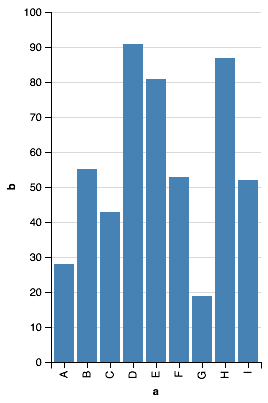

In [10]:
Chart(Data(
    values=[{'a': 'A', 'b': 28}, {'a': 'B', 'b': 55}, {'a': 'C', 'b': 43}, {'a': 'D', 'b': 91}, {'a': 'E', 'b': 81}, {'a': 'F', 'b': 53}, {'a': 'G', 'b': 19}, {'a': 'H', 'b': 87}, {'a': 'I', 'b': 52}],
),
    description='A simple bar chart with embedded data.',
).mark_bar().encode(
    x='a:O',
    y='b:Q',
)

In [11]:
data_sort_country = data_df.groupby(['country'])["ip"].count().reset_index(name="count")

In [12]:
connect_count = 0
for index, row in data_sort_country.iterrows():
    connect_count += row['count']

In [13]:
data_sort_country.at[14, 'country'] = 'Others'

In [14]:
data_sort_country['ratio'] = (round(data_sort_country['count'] / connect_count*100, 2)).astype(str) + '%'
data_sort_country['ratio(%)'] = round(data_sort_country['count'] / connect_count*100, 2)
data_sort_country['ratio'] = data_sort_country['ratio'].astype(str)

## Practice

In [15]:
import os
import folium
import json
import geopandas

In [16]:
world_json = os.path.join('/Users/Kuan-Hao/Documents/大二下/專題研究-莊曜宇/hw_2', 'custom.geo_high.json')

In [17]:
geo_json_data = json.load(open(world_json))
kw = {'location': [48, -102], 'zoom_start': 3}

In [18]:
gdf = geopandas.read_file(world_json)

In [19]:
from branca.colormap import linear

colormap = linear.YlGn.scale(
    0,
    data_sort_country['ratio(%)'].max())

print(colormap(7.0))

colormap

#9cd687


In [20]:
world_country_df = gdf['name'].to_frame(name = 'country')

In [21]:
world_country_df

,country
0,American Samoa
1,Ashmore and Cartier Is.
2,Guam
3,Marshall Is.
4,Coral Sea Is.
5,Kiribati
6,Cook Is.
7,Micronesia
8,Fiji
9,N. Mariana Is.


In [22]:
merge_map_df = pd.merge(world_country_df, data_sort_country, how = 'left', on = ['country'])

In [23]:
merge_map_df

,country,count,ratio,ratio(%)
0,American Samoa,NaN,NaN,NaN
1,Ashmore and Cartier Is.,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Marshall Is.,NaN,NaN,NaN
4,Coral Sea Is.,NaN,NaN,NaN
5,Kiribati,NaN,NaN,NaN
6,Cook Is.,NaN,NaN,NaN
7,Micronesia,NaN,NaN,NaN
8,Fiji,NaN,NaN,NaN
9,N. Mariana Is.,NaN,NaN,NaN


In [24]:
for index, row in merge_map_df.iterrows():
    if(np.isnan(row['ratio(%)'])):
        merge_map_df.at[index, 'ratio(%)'] = 0

In [25]:
merge_map_df

,country,count,ratio,ratio(%)
0,American Samoa,NaN,NaN,0.00
1,Ashmore and Cartier Is.,NaN,NaN,0.00
2,Guam,NaN,NaN,0.00
3,Marshall Is.,NaN,NaN,0.00
4,Coral Sea Is.,NaN,NaN,0.00
5,Kiribati,NaN,NaN,0.00
6,Cook Is.,NaN,NaN,0.00
7,Micronesia,NaN,NaN,0.00
8,Fiji,NaN,NaN,0.00
9,N. Mariana Is.,NaN,NaN,0.00


In [26]:
ratio_dictionary = merge_map_df.set_index('country')['ratio(%)']

In [27]:
merge_map_df[~np.isnan(merge_map_df['count'])].sort_values('country')

,country,count,ratio,ratio(%)
119,Argentina,2.0,0.59%,0.59
13,Australia,21.0,6.23%,6.23
123,Brazil,16.0,4.75%,4.75
113,Canada,2.0,0.59%,0.59
146,China,6.0,1.78%,1.78
127,Colombia,8.0,2.37%,2.37
36,Estonia,1.0,0.3%,0.30
44,France,20.0,5.93%,5.93
42,Germany,5.0,1.48%,1.48
48,Greece,6.0,1.78%,1.78


In [51]:
m = folium.Map(
    [43, -100], 
    zoom_start=4,
    world_copy_jump=True,
    no_wrap=False,)

geojson = folium.GeoJson(
    geo_json_data,
    name = 'ratio of usage',
    highlight_function=lambda feature: {
        'fillColor': colormap(ratio_dictionary[feature['properties']['name']]),
        'color': 'black',
        'weight': 2,
        'fillOpacity': 1.5,
    },
    style_function=lambda feature: {
        'fillColor': colormap(ratio_dictionary[feature['properties']['name']]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }
)
geojson.add_to(m)

# m.choropleth(
#     geo_data=geopandas.read_file(world_json),
# #     data=state_data,
# #     columns=['State', 'Unemployment'],
# #     key_on='feature.id',
#     fill_color='grey',
#     fill_opacity=0.7,
#     line_opacity=0.2,
# #     legend_name='Unemployment Rate (%)',
#     highlight=True
# )

colormap.caption = 'Flow rate color scale'
colormap.add_to(m)
m.save(os.path.join('/Users/Kuan-Hao/Desktop', 'GeoJSON_and_choropleth_3.html'))

TypeError: string indices must be integers

In [61]:
# import branca

# # Create a white image of 4 pixels, and embed it in a url.
# white_tile = branca.utilities.image_to_url([[1, 1], [1, 1]])

# # Create a map using this url for each tile.
# m = folium.Map(tiles=white_tile, attr='white tile', **kw)

# GeoJson(wolrd).add_to(m)

# # m.save('/Users/Kuan-Hao/Desktop/GeoJSONWithoutTitles_1.html')

# m